# Dot Cipher from Segment.io Website

Data analysis of dot cipher puzzle on Segment.com website footer

# Important Questions
1. How many rows?
2. How many columns?
3. Unique colors?
4. How many circles(dots)?
5. How many columns with unique colors? Which columns?
6. How many rows with unique colors? Which rows?

# Imports and Libraries

In [1]:
%matplotlib inline
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np
from xml.dom import minidom
from IPython.display import Markdown, display

# Original Unedited Image

In [2]:
Image(url= "data.svg")

# Useful Classes and Functions

## SVG Class to Handle Loading/Export the SVG XML

In [3]:
class SVG(object):
    def __init__(self, filename):
        self.xml = minidom.parse(filename).documentElement
        
        # I think the bookends aren't part of the key/msg so I'm removing them
        self.xml.childNodes[1].removeChild(self.xml.childNodes[1].childNodes[0])
        self.xml.childNodes[1].removeChild(self.xml.childNodes[1].childNodes[0])
        
        self.width = self.xml.getAttribute('width')
        self.height = self.xml.getAttribute('height')
    
    def circles(self):
        return self.xml.getElementsByTagName('circle')
    
    def groupsCount(self):
        return len(self.xml.getElementsByTagName('g'))
    
    def circlesCount(self):
        return len(self.circles())
    
    def exportSVG(filename, xml):
        file_handle = open(filename,"w")
        xml.writexml(file_handle)
        file_handle.close()
    
    def export(self, filename):
        file_handle = open(filename,"w")
        self.xml.writexml(file_handle)
        file_handle.close()
        return file_handle
    
    def SVGSkeleton():
        self.svgSkeleton = self.xml
        self.svgSkeleton.childNodes[1].removeChild(self.xml.childNodes[1].childNodes[0])
        return SVGSkeleton

## Circle Data Structure

In [4]:
class Circle(object):
    def __init__(self, x, y, color):
        self.x = Circle.normalizeX(x)
        self.y = Circle.normalizeY(y)
        self.color = color
    
    def normalizeX(x):
        return int((int(x)-3)/11)

    def normalizeY(y):
        return int((int(y)-3)/8)

    def unnormalizeX(x):
        return str((x * 11) + 3)

    def unnormalizeY(y):
        return str((y * 8) + 3)

    #  <circle fill="#49B882" transform="rotate(180 3 139)" cx="3" cy="139" r="3"/>
    def convert_to_xml(self):
        doc = minidom.Document()
        circleElement = doc.createElement("circle")
        circleElement.setAttribute("fill",self.color)
        circleElement.setAttribute("transform","rotate(180 {} {})".format(Circle.unnormalizeX(self.x),Circle.unnormalizeY(self.y)))
        circleElement.setAttribute("cx",Circle.unnormalizeX(self.x))
        circleElement.setAttribute("cy",Circle.unnormalizeY(self.y))
        circleElement.setAttribute("r","3")
        return circleElement

## Data Controller Helper Class

In [5]:
class DataController(object):
    def __init__(self,xml):
        circles = []
        for circle in xml:
            circles.append(Circle(circle.attributes['cx'].value,circle.attributes['cy'].value,circle.attributes['fill'].value))
        self.circles = circles
    
    @classmethod
    def import_xml(self, xml):
        circles = []
        for circle in xml:
            circles.append(Circle(circle.attributes['cx'].value,circle.attributes['cy'].value,circle.attributes['fill'].value))
        self.circles = circles
        return self
    
    def export_xml(self):
        for circle in self.circles:
            return circle.convert_to_xml()
    
    def circleCount(self):
        return len(self.circles)
    
    def colors(self):
        self.colors = set(circle.color for circle in self.circles)
        return self.colors
    
    def colorsCounter(self):
        self.colorCounts = Counter(circle.color for circle in self.circles).most_common()
        return self.colorCounts
    
    def columns(self):
        return sorted(set(circle.x for circle in self.circles))
    
    def rows(self):
        return sorted(set(circle.y for circle in self.circles))
    
    def uniqueColorCircles(self):
        return [circle for circle in self.circles if circle.color != "#49B882"]
    
    def uniqueColorColumns(self):
        return sorted(set(circle.x for circle in self.uniqueColorCircles()))
    def uniqueColorRows(self):
        return sorted(set(circle.y for circle in self.uniqueColorCircles()))
    
    def circlesPerColumn(self):
        return Counter(circle.x for circle in self.circles)
    
    def circlesPerRow(self):
        return Counter(circle.y for circle in self.circles)

# Helper Functions

In [6]:
# Function to Print in Markdown in Jupyter
def printmd(string):
    display(Markdown(string))
        
# testCircles = []
# testCircles.append(Circle(14,33,"#49B882"))
# testCircles.append(Circle(14,33,"#49B882"))
# circlesController = CirclesController(testCircles)

# SVG.exportSVG("test.svg",circlesController.export_xml())

# Data Load - Parsing XML of SVG file

In [7]:
svg = SVG('data.svg')
printmd('**SVG Width:** {}\n'.format(svg.width))
printmd('**SVG Height:** {}\n'.format(svg.height))
printmd('**SVG Circle Count:** {}\n'.format(svg.circlesCount()))

**SVG Width:** 1413


**SVG Height:** 150


**SVG Circle Count:** 567


# Image with Bookend Groups Removed

![](center.svg)

# Circles

In [8]:
dataController = DataController(svg.circles())
numCircles = dataController.circleCount()
printmd('# Number of Circles: {}\n'.format(numCircles))

# Number of Circles: 567


# Colors

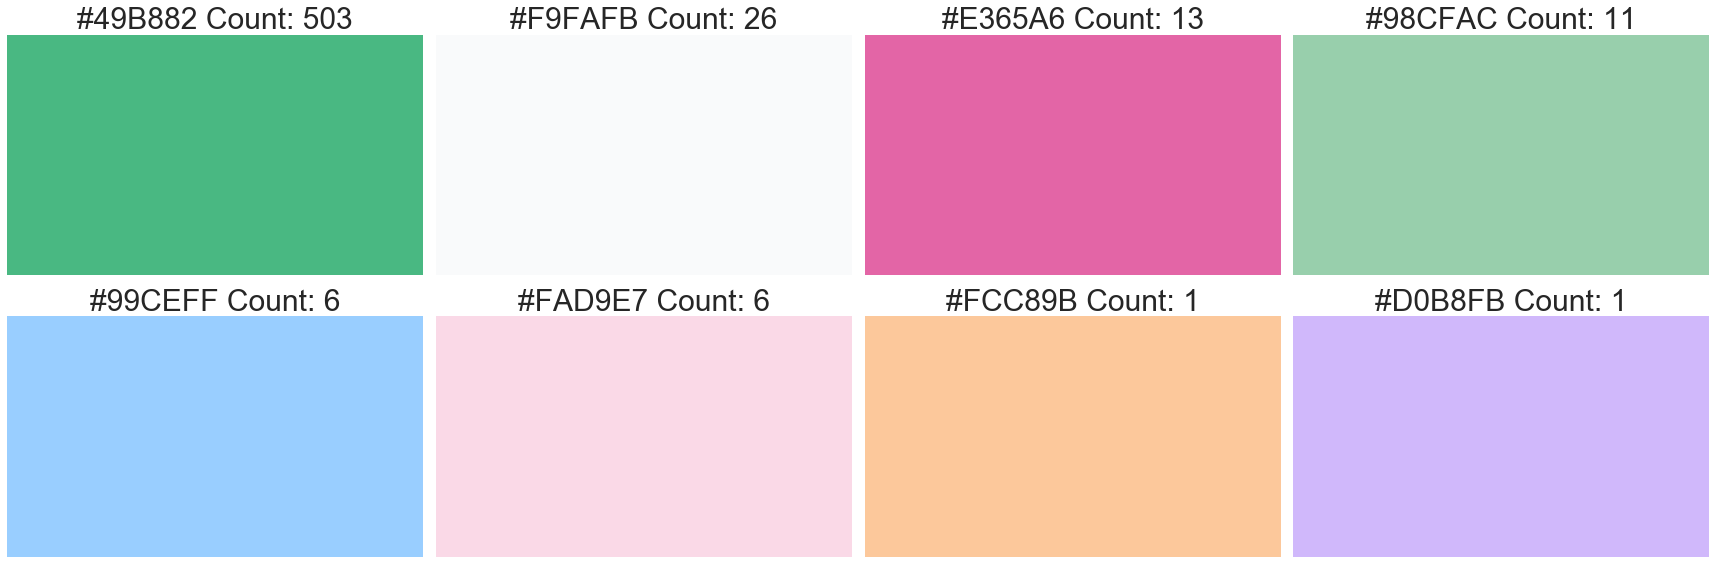

In [9]:
plt.figure(figsize=(24, 8))
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
for index, colorCount in enumerate(dataController.colorsCounter()):
    ax1 = plt.subplot(2, 4, index + 1)
    ax1.set_title(colorCount[0] + " Count: " + str(colorCount[1]),fontsize= 30)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_facecolor(colorCount[0])
plt.tight_layout()
plt.show()

# Rows and Columns

In [10]:
numColumns = len(dataController.columns())
printmd('# Columns: {}\n'.format(numColumns))

numRows = len(dataController.rows())
printmd('# Rows: {}\n'.format(numRows))

cells = numColumns * numRows
printmd('# Cells: {}\n'.format(cells))

# Columns: 94


# Rows: 19


# Cells: 1786


### Unique Color Columns

[0, 2, 6, 7, 8, 10, 11, 14, 15, 16, 19, 21, 22, 23, 24, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40, 41, 42, 43, 46, 47, 50, 51, 53, 56, 57, 60, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86, 88, 90, 91, 92, 93]


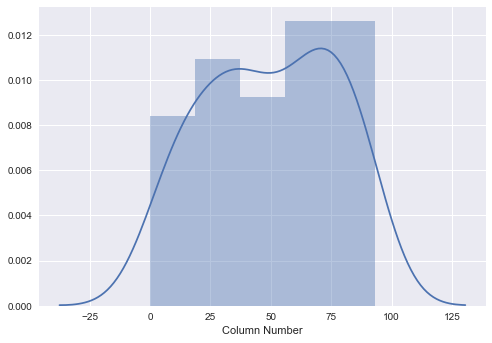

In [11]:
printmd("### Unique Color Columns")
print(dataController.uniqueColorColumns())

sns.set(color_codes=True)
sns.distplot(dataController.uniqueColorColumns(), axlabel="Column Number");


### Unique Color Rows

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


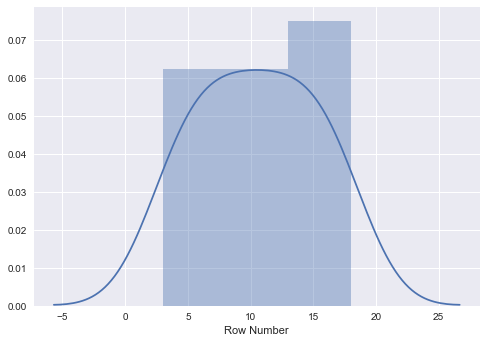

In [12]:
printmd("### Unique Color Rows")
print(dataController.uniqueColorRows())

sns.set(color_codes=True)
sns.distplot(dataController.uniqueColorRows(), axlabel="Row Number");

### Difference between unique color columns

[2 4 1 1 2 1 3 1 1 3 2 1 1 1 4 1 1 1 1 2 2 1 1 1 1 1 1 1 3 1 3 1 2 3 1 3 1
 1 1 2 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 1 1 2 2 1 1 1]


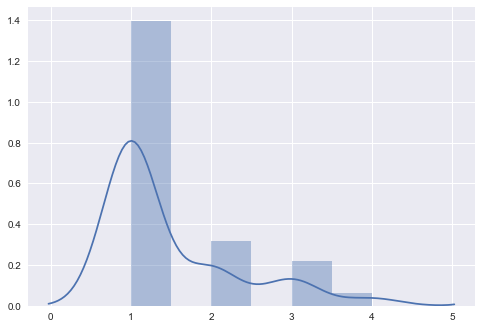

In [13]:
printmd("### Difference between unique color columns")
print(np.diff(dataController.uniqueColorColumns()))

sns.set(color_codes=True)
sns.distplot(np.diff(dataController.uniqueColorColumns()));

In [ ]:
printmd("### Difference between unique color rows")
print(np.diff(dataController.uniqueColorRows()))

### Difference between unique color rows

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


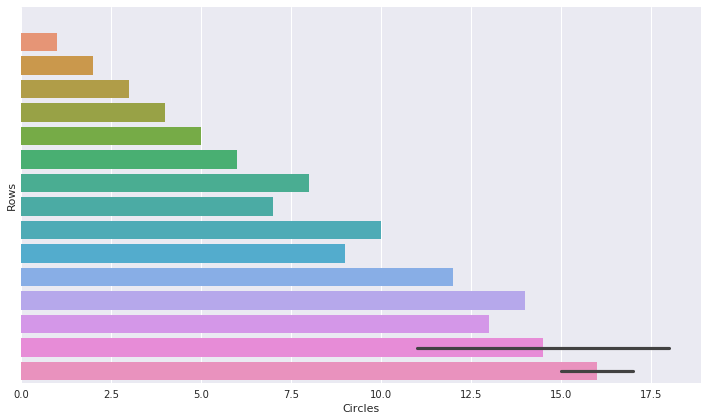

In [ ]:
labels, values = zip(*dataController.circlesPerRow().items())
indexes = np.arange(len(labels))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(labels, values, orient="h")
ax.set_xlabel("Circles")
ax.set_ylabel("Rows")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

plt.rcdefaults()
fig, ax = plt.subplots(1,1,figsize=(24,20))
ax.set_title('Circles per Row',fontsize= 30)
ax.barh(indexes, values,1, align='center', ecolor='black')
ax.set_yticks(indexes)
ax.set_yticklabels(labels,fontsize= 30)
ax.set_ylabel('Rows',fontsize= 30)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Circle Count',fontsize= 30)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [ ]:
labels, values = zip(*dataController.circlesPerColumn().items())
indexes = np.arange(len(labels))
fig, ax = plt.subplots(1,1,figsize=(24,10))
ax.set_title('Circles per Column',fontsize= 30)
plt.bar(indexes, values, 1, align='center', ecolor='black')
plt.xticks(indexes + 1 * 0.5, labels)
ax.set_xlabel('Columns',fontsize= 30)
ax.set_ylabel('Circle Count',fontsize= 30)
plt.show()

In [ ]:
unique_color_x = set(circle.x for circle in dataController.uniqueColorCircles())

color_circle_columns = []
for j in unique_color_x:
    color_circle_columns.append([circle for circle in dataController.circles if circle.x == j])

dots_per_color_column = Counter(circle.x for circle in dataController.uniqueColorCircles())
dots_per_color_row = Counter(circle.y for circle in dataController.uniqueColorCircles())

In [ ]:
flat_list = [circle for column in color_circle_columns for circle in column]
dots_per_color_column = Counter(circle.x for circle in flat_list)
dots_per_color_row = Counter(circle.y for circle in flat_list)

labels, values = zip(*dots_per_color_column.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24,8))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
labels, values = zip(*dots_per_color_row.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24, 12))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()